# THOR WWII 

## Theater History of Operations (THOR) Data: World War II

In [62]:
import pandas as pd
import geopandas as gpd
import fiona

In [2]:
print(pd.__version__)

1.2.4


In [3]:
print(gpd.__version__)

0.6.1


In [4]:
# impostazioni di visualizzazione dei dataframe di pandas
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_info_columns',-1)
pd.set_option('display.max_info_rows',-1)
pd.options.display.max_rows = 4000
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Aircraft Glossary

importa file csv che descrivi i tipi di aereomobili utilizzati nelle missioni di bombardamento

In [64]:
aircraft_glossary = pd.read_csv('THOR WWII Aircraft Glossary.csv')

In [63]:
aircraft_glossary.head(5)

GLOSS_ID AIRCRAFT      NAME                             FULL_NAME  \
0         1      A20       A20                    Douglas A-20 Havoc   
1         2      A24       A24                 Douglass A-24 Banshee   
2         3      A26       A26                  Douglas A-26 Invader   
3         4      A36       A36  North American A-36 Apache (Invader)   
4         5     ALBA  Albacore                      Fairey Albacore    

                         AIRCRAFT_TYPE  \
0  Boston Light Bomber / Night-Fighter   
1         Dive Bomber / Reconnaissance   
2        Medium Bomber / Heavy Assault   
3          Ground Attack / Dive Bomber   
4                 Naval Torpedo Bomber   

                                                         HYPERLINK  
0   http://militaryfactory.com/aircraft/detail.asp?aircraft_id=186  
1   http://militaryfactory.com/aircraft/detail.asp?aircraft_id=491  
2    http://militaryfactory.com/aircraft/detail.asp?aircraft_id=91  
3   http://militaryfactory.com/aircraft/detail.asp?aircraft_id=687  
4  http://militaryfactory.com/aircraft/detail.asp?aircraft_id=1390

### Weapon Glossary

importa file csv che descrive gli ordigni esplosivi utilizzati nelle missioni di bombardamento

In [8]:
weapon_glossary = pd.read_csv('THOR WWII Weapon Glossary.csv')

In [9]:
weapon_glossary.head(5)

RN COUNTRY                       WEAPON_NAME WEAPON_TYPE WEAPON_CLASS  \
0   1     USA                  10 lb Incendiary         NaN           IC   
1   2     USA                 100 lb Incendiary         NaN           IC   
2   3     USA      100 lb WP (White Phosphrous)         NaN           IC   
3   4     USA  1000 lb aux fuel tank Incendiary         NaN           IC   
4   5     USA       136 lb (38x4 Clusters) I-M6        I-M6           IC   

   NUMBER_OF_BOMBLETS   ALT_WEAPON_NAME  \
0                 NaN  AN-M67 or AN-M69   
1                 NaN             M47A2   
2                 NaN             M47A2   
3                 NaN               NaN   
4                 NaN                M6   

                                                                            WEAPON_DESCRIPTION  
0                        10 lb Incendiary that used White Phosphorous or other incendiary fuel  
1                        100 lb M47A2 Incendiary usually loaded with gelled gassoline (Napalm)  
2                                                                      100 lb M47A2 Smoke bomb  
3  1000 lb Auxiliary fuel tank. When used as incendiaries they were usually filled with napalm  
4         M6 Cluster containing 38 AN-M50 incendiary bombs. They usually carried 128 AN-M50's.

### Bombing Operations Data

importa i dati dei bombardamenti degli alleati (USA, UK, ecc.)

In [10]:
# df = pd.read_csv('THOR WWII Bombing Operations.csv',parse_dates=['MSNDATE'],infer_datetime_format=True,low_memory=False)

In [11]:
df = pd.read_csv('THOR_WWII_DATA_CLEAN.csv',parse_dates=['MSNDATE'],infer_datetime_format=True,low_memory=False)

In [12]:
df.head(5)

WWII_ID  MASTER_INDEX_NUMBER    MSNDATE THEATER    NAF  \
0        1                  NaN 1943-08-15     MTO  12 AF   
1     4285            20,028.00 1945-02-20     PTO   5 AF   
2        3                  NaN 1943-08-15     MTO  12 AF   
3        4                  NaN 1943-08-15     MTO  12 AF   
4     8167            14,639.00 1945-02-23     PTO   5 AF   

  COUNTRY_FLYING_MISSION  TGT_COUNTRY_CODE         TGT_COUNTRY  \
0                    USA             13.00               ITALY   
1                    USA               NaN  PHILIPPINE ISLANDS   
2                    USA             13.00               ITALY   
3                    USA             13.00               ITALY   
4                    USA               NaN  PHILIPPINE ISLANDS   

      TGT_LOCATION             TGT_TYPE    TGT_ID  TGT_INDUSTRY_CODE  \
0        SPADAFORA                  NaN 40,675.00             650.00   
1  PUERTA PRINCESA  UNIDENTIFIED TARGET       NaN                NaN   
2          COSENZA                  NaN  9,630.00             810.00   
3      GIOJA TAURO                  NaN 16,140.00             631.00   
4      BALETE PASS          WOODED AREA       NaN                NaN   

  TGT_INDUSTRY SOURCE_LATITUDE SOURCE_LONGITUDE  LATITUDE  LONGITUDE  \
0          NaN      38.2166667       15.3666667     38.22      15.37   
1          NaN             945            11845      9.75     118.75   
2          NaN           3916N             1615     39.27      16.25   
3          NaN           3826N             1554     38.43      15.90   
4          NaN            1605            12055     16.08     120.92   

         UNIT_ID  MDS AIRCRAFT_NAME  MSN_TYPE TGT_PRIORITY  \
0  27 FBG/86 FBG  A36           A36       NaN          NaN   
1           89 S  A20           A20     10.00            1   
2  27 FBG/86 FBG  A36           A36       NaN          NaN   
3  27 FBG/86 FBG  A36           A36       NaN          NaN   
4          113 S  A20           A20     10.00            1   

  TGT_PRIORITY_EXPLANATION  AC_ATTACKING  ALTITUDE  ALTITUDE_FEET  \
0                      NaN           NaN       NaN           0.00   
1                      NaN          1.00      1.00           0.00   
2                      NaN           NaN       NaN           0.00   
3                      NaN           NaN       NaN           0.00   
4                      NaN          1.00      1.00           0.00   

   NUMBER_OF_HE              TYPE_OF_HE  LBS_HE  TONS_OF_HE  NUMBER_OF_IC  \
0         40.00  500 LB GP (GP-M43/M64)     NaN       10.00           NaN   
1           NaN      250 LB GP (GP-M57)     NaN         NaN           NaN   
2         36.00  500 LB GP (GP-M43/M64)     NaN        9.00           NaN   
3         30.00  500 LB GP (GP-M43/M64)     NaN        7.50           NaN   
4           NaN      250 LB GP (GP-M57)     NaN         NaN           NaN   

          TYPE_OF_IC  LBS_IC  TONS_OF_IC  NUMBER_OF_FRAG TYPE_OF_FRAG  \
0                NaN     NaN         NaN             NaN          NaN   
1  100 LB INCENDIARY     NaN         NaN             NaN          NaN   
2                NaN     NaN         NaN             NaN          NaN   
3                NaN     NaN         NaN             NaN          NaN   
4                NaN     NaN         NaN             NaN          NaN   

   LBS_FRAG  TONS_OF_FRAG  TOTAL_LBS  TOTAL_TONS          TAKEOFF_BASE  \
0       NaN           NaN        NaN       10.00  PONTE OLIVO AIRFIELD   
1       NaN           NaN        NaN         NaN                   NaN   
2       NaN           NaN        NaN        9.00  PONTE OLIVO AIRFIELD   
3       NaN           NaN        NaN        7.50  PONTE OLIVO AIRFIELD   
4       NaN           NaN        NaN         NaN                   NaN   

  TAKEOFF_COUNTRY  TAKEOFF_LATITUDE  TAKEOFF_LONGITUDE  AC_LOST  AC_DAMAGED  \
0          SICILY             37.13              14.32      NaN         NaN   
1             NaN               NaN                NaN      NaN         NaN   
2

Si crea un geodataframe aggiungendo una colonna di tipo geometry combinando le colonne LONGITUDE (X) e LATITUDE (Y)

In [13]:
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.LONGITUDE,df.LATITUDE),crs="EPSG:4326")

In [14]:
gdf.head(5)

WWII_ID  MASTER_INDEX_NUMBER    MSNDATE THEATER    NAF  \
0        1                  NaN 1943-08-15     MTO  12 AF   
1     4285            20,028.00 1945-02-20     PTO   5 AF   
2        3                  NaN 1943-08-15     MTO  12 AF   
3        4                  NaN 1943-08-15     MTO  12 AF   
4     8167            14,639.00 1945-02-23     PTO   5 AF   

  COUNTRY_FLYING_MISSION  TGT_COUNTRY_CODE         TGT_COUNTRY  \
0                    USA             13.00               ITALY   
1                    USA               NaN  PHILIPPINE ISLANDS   
2                    USA             13.00               ITALY   
3                    USA             13.00               ITALY   
4                    USA               NaN  PHILIPPINE ISLANDS   

      TGT_LOCATION             TGT_TYPE    TGT_ID  TGT_INDUSTRY_CODE  \
0        SPADAFORA                  NaN 40,675.00             650.00   
1  PUERTA PRINCESA  UNIDENTIFIED TARGET       NaN                NaN   
2          COSENZA                  NaN  9,630.00             810.00   
3      GIOJA TAURO                  NaN 16,140.00             631.00   
4      BALETE PASS          WOODED AREA       NaN                NaN   

  TGT_INDUSTRY SOURCE_LATITUDE SOURCE_LONGITUDE  LATITUDE  LONGITUDE  \
0          NaN      38.2166667       15.3666667     38.22      15.37   
1          NaN             945            11845      9.75     118.75   
2          NaN           3916N             1615     39.27      16.25   
3          NaN           3826N             1554     38.43      15.90   
4          NaN            1605            12055     16.08     120.92   

         UNIT_ID  MDS AIRCRAFT_NAME  MSN_TYPE TGT_PRIORITY  \
0  27 FBG/86 FBG  A36           A36       NaN          NaN   
1           89 S  A20           A20     10.00            1   
2  27 FBG/86 FBG  A36           A36       NaN          NaN   
3  27 FBG/86 FBG  A36           A36       NaN          NaN   
4          113 S  A20           A20     10.00            1   

  TGT_PRIORITY_EXPLANATION  AC_ATTACKING  ALTITUDE  ALTITUDE_FEET  \
0                      NaN           NaN       NaN           0.00   
1                      NaN          1.00      1.00           0.00   
2                      NaN           NaN       NaN           0.00   
3                      NaN           NaN       NaN           0.00   
4                      NaN          1.00      1.00           0.00   

   NUMBER_OF_HE              TYPE_OF_HE  LBS_HE  TONS_OF_HE  NUMBER_OF_IC  \
0         40.00  500 LB GP (GP-M43/M64)     NaN       10.00           NaN   
1           NaN      250 LB GP (GP-M57)     NaN         NaN           NaN   
2         36.00  500 LB GP (GP-M43/M64)     NaN        9.00           NaN   
3         30.00  500 LB GP (GP-M43/M64)     NaN        7.50           NaN   
4           NaN      250 LB GP (GP-M57)     NaN         NaN           NaN   

          TYPE_OF_IC  LBS_IC  TONS_OF_IC  NUMBER_OF_FRAG TYPE_OF_FRAG  \
0                NaN     NaN         NaN             NaN          NaN   
1  100 LB INCENDIARY     NaN         NaN             NaN          NaN   
2                NaN     NaN         NaN             NaN          NaN   
3                NaN     NaN         NaN             NaN          NaN   
4                NaN     NaN         NaN             NaN          NaN   

   LBS_FRAG  TONS_OF_FRAG  TOTAL_LBS  TOTAL_TONS          TAKEOFF_BASE  \
0       NaN           NaN        NaN       10.00  PONTE OLIVO AIRFIELD   
1       NaN           NaN        NaN         NaN                   NaN   
2       NaN           NaN        NaN        9.00  PONTE OLIVO AIRFIELD   
3       NaN           NaN        NaN        7.50  PONTE OLIVO AIRFIELD   
4       NaN           NaN        NaN         NaN                   NaN   

  TAKEOFF_COUNTRY  TAKEOFF_LATITUDE  TAKEOFF_LONGITUDE  AC_LOST  AC_DAMAGED  \
0          SICILY             37.13              14.32      NaN         NaN   
1             NaN               NaN                NaN      NaN         NaN   
2

In [15]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [16]:
gdf.crs

'EPSG:4326'

In [17]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [18]:
# si deve ripulire dei dati con coordinate errate
selRows = gdf[gdf['LONGITUDE'] > 200].index
gdf = gdf.drop(selRows, axis=0)

In [19]:
# numero records
gdf.WWII_ID.size

178167

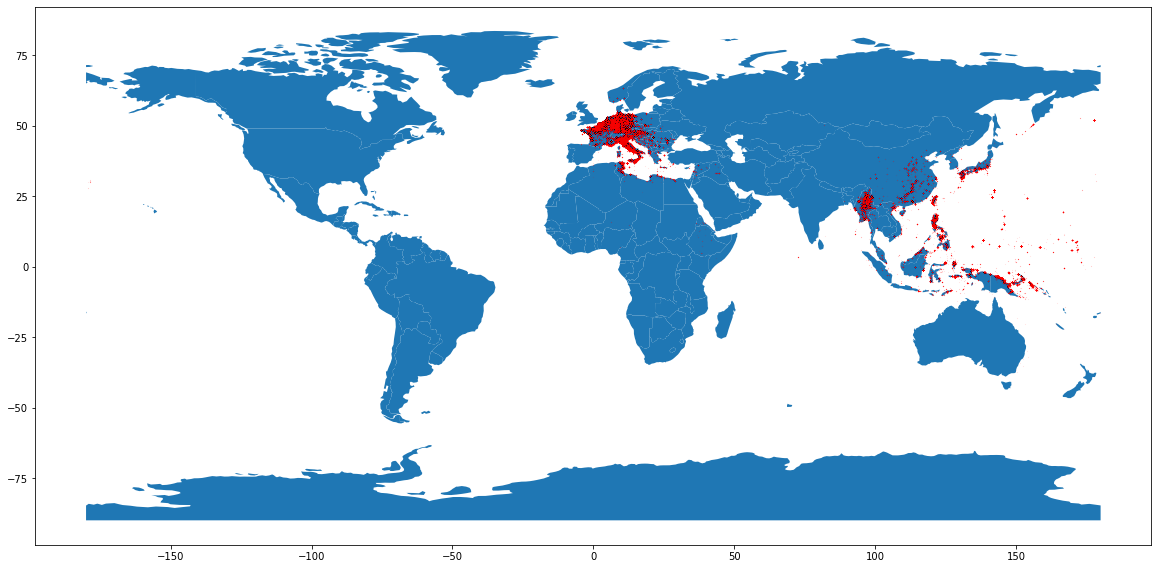

In [20]:
import matplotlib.pyplot as plt
figura, asse = plt.subplots()
figura.set_size_inches(20,20)
asse.set_aspect('equal')
#world.plot(ax=ax, color='white', edgecolor='black')
world.plot(ax=asse) #disegna la mappa del mondo
gdf.plot(ax=asse,color='red',markersize=0.001) # disegna i punti del geoframe
plt.show()

In [21]:
# gdf.to_file("prova.gpkg",driver="GPKG")

In [22]:
gdf.TGT_COUNTRY.describe()

count      177568
unique         90
top       GERMANY
freq        61719
Name: TGT_COUNTRY, dtype: object

### numero missioni per paese

In [23]:
#numero missioni per paese
numero_missioni_per_paese = gdf.TGT_COUNTRY.value_counts()
numero_missioni_per_paese

GERMANY                             61719
ITALY                               23689
FRANCE                              22196
BURMA                                8259
PHILIPPINE ISLANDS                   8180
NEW GUINEA                           7213
AUSTRIA                              4380
CHINA                                4060
HOLLAND OR NETHERLANDS               3501
BISMARK ARCHIPELAGO                  3484
CELEBES ISLANDS                      3094
JAPAN                                2748
UNKNOWN OR NOT INDICATED             2742
BELGIUM                              2149
TUNISIA                              1978
FORMOSA AND RYUKYU ISLANDS           1803
SOLOMON ISLANDS                      1689
BORNEO                               1399
CAROLINE ISLANDS                     1032
CZECHOSLOVAKIA                        995
VOLCANO AND BONIN ISLANDS             966
YUGOSLAVIA                            944
HUNGARY                               874
ROMANIA                           

### TOTAL_TONS = Total Tons of munitions dropped on target

In [24]:
paesi_bombardati = gdf.groupby('TGT_COUNTRY')

In [25]:
paesi_bombardati.first()

WWII_ID  MASTER_INDEX_NUMBER    MSNDATE  \
TGT_COUNTRY                                                                 
"PAPUA NEW GUINEA, MANUS ISLAND"   135749                  NaN 1942-12-19   
ALBANIA                              4424            95,802.00 1943-09-02   
ALEUTIAN ISLANDS                   177935            38,640.00 1943-08-12   
ALGERIA                              7997           198,512.00 1943-09-13   
ANDAMAN ISLANDS                    117576                 1.00 1942-04-02   
AUSTRALIA                          124966                  NaN 1942-07-22   
AUSTRIA                               235           116,813.00 1945-02-16   
BALI                               114897                  NaN 1942-02-09   
BELGIUM                               784           295,681.00 1944-07-29   
BISMARK ARCHIPELAGO                   121            39,530.00 1944-07-28   
BORNEO                             129340            40,412.00 1945-05-30   
BOUGAINVILLE                        49970                  NaN 1944-09-25   
BULGARIA                            17822           107,956.00 1944-08-15   
BURMA                                 104            34,489.00 1944-07-28   
CAROLINE ISLANDS                    54184            41,646.00 1944-03-06   
CELEBES ISLANDS                       115             5,118.00 1944-07-28   
CHINA                                 103            48,291.00 1944-07-28   
CHINA MINING                        17307            56,937.00 1945-03-04   
CORAL SEA AREA                         94             3,647.00 1943-08-15   
CORSICA                             38315            98,028.00 1944-01-28   
CRETE                              137339           698,307.00 1943-01-02   
CYPRUS                              91941           699,180.00 1941-07-03   
CZECHOSLOVAKIA                      22373           108,243.00 1944-08-20   
DENMARK                             20017           293,362.00 1943-11-17   
EGYPT                              131917           698,798.00 1942-10-27   
ERITREA                             45677                  NaN 1940-06-11   
ETHIOPIA                            45686                  NaN 1940-06-13   
ETHIOPIA/ABSINNYA                   51030           273,339.00 1940-08-20   
FORMOSA                             14274               158.00 1945-03-02   
FORMOSA AND RYUKYU ISLANDS          26429             1,343.00 1945-03-11   
FRANCE                                 17            95,429.00 1943-08-15   
FRENCH INDO CHINA                   37836               278.00 1945-03-20   
FRENCH INDO CHINA MINING            52056            56,951.00 1945-03-28   
FRENCH WEST AFRICA                 127499           102,775.00 1944-06-06   
GERMANY                                12           292,817.00 1943-08-15   
GILBERT ISLANDS                      9455            24,824.00 1943-09-17   
GREAT BRITAIN                       21525            97,077.00 1943-11-26   
GREECE                               1205           698,405.00 1943-08-18   
HOLLAND OR NETHERLANDS                 14            95,435.00 1943-08-15   
HUNGARY                              1330           106,444.00 1944-07-30   
INDIA                              118877            24,876.00 1944-05-31   
INDIAN OCEAN                       117998                  NaN 1942-04-09   
INDONESIA                          114479                  NaN 1942-01-27   
IRAQ                                83060           698,623.00 1941-05-02   
ITALY                                   1            95,420.00 1943-08-15   
JAPAN                              145767            55,382.00 1945-07-23   
JAPAN MINING                        49604            57,008.00 1945-03-27   
JAVA                                65811               968.00 1944-10-09   
KOREA OR CHOSEN                     45221            53,483.00 1944-09-17   
KOREA OR CHOSEN MINING             142849            57,282.00 1945-07-11   
KURILE ISLANDS                

In [26]:
paesi_bombardati['TOTAL_TONS'].sum().sort_values(ascending=False)

TGT_COUNTRY
GERMANY                            1,991,577.00
FRANCE                               820,495.00
ITALY                                417,004.62
JAPAN                                183,762.59
AUSTRIA                              149,460.10
PHILIPPINE ISLANDS                    62,681.35
BELGIUM                               53,405.00
HOLLAND OR NETHERLANDS                50,700.00
NEW GUINEA                            46,222.98
ROMANIA                               43,216.82
CZECHOSLOVAKIA                        41,318.68
HUNGARY                               39,194.80
UNKNOWN OR NOT INDICATED              37,582.00
YUGOSLAVIA                            36,443.03
BURMA                                 35,133.08
BISMARK ARCHIPELAGO                   28,949.53
GREECE                                24,407.54
CELEBES ISLANDS                       19,466.00
FORMOSA AND RYUKYU ISLANDS            18,320.89
BORNEO                                13,890.00
TUNISIA                     

In [27]:
#TOTAL_TONS = Total Tons of munitions dropped on target
tonnellaggio_per_paese = gdf.groupby('TGT_COUNTRY')['TOTAL_TONS'].sum().sort_values(ascending=False)

In [28]:
tonnellaggio_per_paese

TGT_COUNTRY
GERMANY                            1,991,577.00
FRANCE                               820,495.00
ITALY                                417,004.62
JAPAN                                183,762.59
AUSTRIA                              149,460.10
PHILIPPINE ISLANDS                    62,681.35
BELGIUM                               53,405.00
HOLLAND OR NETHERLANDS                50,700.00
NEW GUINEA                            46,222.98
ROMANIA                               43,216.82
CZECHOSLOVAKIA                        41,318.68
HUNGARY                               39,194.80
UNKNOWN OR NOT INDICATED              37,582.00
YUGOSLAVIA                            36,443.03
BURMA                                 35,133.08
BISMARK ARCHIPELAGO                   28,949.53
GREECE                                24,407.54
CELEBES ISLANDS                       19,466.00
FORMOSA AND RYUKYU ISLANDS            18,320.89
BORNEO                                13,890.00
TUNISIA                     

### ITALIA

In [29]:
filtro =  gdf['TGT_COUNTRY']=='ITALY'

In [30]:
gdf[filtro]

WWII_ID  MASTER_INDEX_NUMBER    MSNDATE THEATER    NAF  \
0             1                  NaN 1943-08-15     MTO  12 AF   
2             3                  NaN 1943-08-15     MTO  12 AF   
3             4                  NaN 1943-08-15     MTO  12 AF   
8             9                  NaN 1943-08-15     MTO  12 AF   
9            10                  NaN 1943-08-15     MTO  12 AF   
...         ...                  ...        ...     ...    ...   
178146   178608           106,320.00 1944-07-28     MTO  12 AF   
178147   178609           209,570.00 1944-07-28     MTO  12 AF   
178148   178610           209,574.00 1944-07-28     MTO  12 AF   
178194   178656           216,591.00 1945-02-15     MTO  15 AF   
178195   178657           216,592.00 1945-02-15     MTO  15 AF   

       COUNTRY_FLYING_MISSION  TGT_COUNTRY_CODE TGT_COUNTRY      TGT_LOCATION  \
0                         USA             13.00       ITALY         SPADAFORA   
2                         USA             13.00       ITALY           COSENZA   
3                         USA             13.00       ITALY       GIOJA TAURO   
8                         USA             13.00       ITALY            SCILLA   
9                         USA             13.00       ITALY       GIOJA TAURO   
...                       ...               ...         ...               ...   
178146                    USA             13.00       ITALY  41 00 N 016 40 E   
178147                    USA             13.00       ITALY  41 00 N 016 40 E   
178148                    USA             13.00       ITALY  41 00 N 016 40 E   
178194                    USA             13.00       ITALY             FIUME   
178195                    USA             13.00       ITALY             FIUME   

          TGT_TYPE    TGT_ID  TGT_INDUSTRY_CODE                  TGT_INDUSTRY  \
0              NaN 40,675.00             650.00                           NaN   
2              NaN  9,630.00             810.00                           NaN   
3              NaN 16,140.00             631.00                           NaN   
8              NaN 39,469.00             830.00                           NaN   
9              NaN 16,140.00              20.00  ARMAMENT AND ORDNANCE PLANTS   
...            ...       ...                ...                           ...   
178146  AMMUNITION 90,393.00              83.00   SUPPLY DUMPS AND WAREHOUSES   
178147  AMMUNITION 90,393.00              83.00   SUPPLY DUMPS AND WAREHOUSES   
178148  AMMUNITION 90,393.00              83.00   SUPPLY DUMPS AND WAREHOUSES   
178194   SHIP YARD 13,896.00              75.00                 SHIP BUILDING   
178195   SHIP YARD 13,896.00              75.00                 SHIP BUILDING   

       SOURCE_LATITUDE SOURCE_LONGITUDE  LATITUDE  LONGITUDE        UNIT_ID  \
0           38.2166667       15.3666667     38.22      15.37  27 FBG/86 FBG   
2                3916N             1615     39.27      16.25  27 FBG/86 FBG   
3                3826N             1554     38.43      15.90  27 FBG/86 FBG   
8                3814N             1543     38.23      15.72  27 FBG/86 FBG   
9                3826N             1554     38.43      15.90  27 FBG/86 FBG   
...                ...              ...       ...        ...            ...   
178146            4100             1640     41.00      16.67            NaN   
178147            4100             1640     41.00      16.67            NaN   
178148            4100             1640     41.00      16.67            NaN   
178194            4520             1426     45.33      14.43            NaN   
178195            4520             1426     45.33      14.43            NaN   

         MDS AIRCRAFT_NAME  MSN_TYPE TGT_PRIORITY TGT_PRIORITY_EXPLANATION  \
0        A36           A36       NaN          NaN                      NaN   
2        A36           A36       NaN          NaN                      NaN   
3        A36           A36       NaN          NaN                      NaN   
8       

### LIVORNO

In [31]:
livorno = gdf[gdf['TGT_LOCATION']=='LEGHORN']

In [32]:
livorno

WWII_ID  MASTER_INDEX_NUMBER    MSNDATE THEATER    NAF  \
10053     10054           160,771.00 1943-09-21     MTO  12 AF   
10054     10055           160,770.00 1943-09-21     MTO  12 AF   
10055     10056           198,686.00 1943-09-21     MTO  12 AF   
10056     10057           198,687.00 1943-09-21     MTO  12 AF   
18006     18007           161,050.00 1943-11-04     MTO  12 AF   
41273     41274           162,226.00 1944-02-07     MTO  12 AF   
41274     41275           162,227.00 1944-02-07     MTO  12 AF   
43392     43393           162,393.00 1944-02-13     MTO  12 AF   
43604     43605           162,391.00 1944-02-13     MTO  12 AF   
43605     43606           162,392.00 1944-02-13     MTO  12 AF   
43824     43825            98,429.00 1944-02-14     MTO  12 AF   
43825     43826            98,431.00 1944-02-14     MTO  12 AF   
43826     43827           201,169.00 1944-02-14     MTO  12 AF   
43827     43828           201,171.00 1944-02-14     MTO  12 AF   
43828     43829            98,430.00 1944-02-14     MTO  12 AF   
43829     43830           201,170.00 1944-02-14     MTO  12 AF   
44195     44196            98,444.00 1944-02-15     MTO  12 AF   
44196     44197            98,445.00 1944-02-15     MTO  12 AF   
44197     44198            98,446.00 1944-02-15     MTO  12 AF   
44198     44199           201,183.00 1944-02-15     MTO  12 AF   
44199     44200           201,184.00 1944-02-15     MTO  12 AF   
44400     44401           201,185.00 1944-02-15     MTO  12 AF   
45032     45033            98,508.00 1944-02-18     MTO  12 AF   
45033     45034            98,509.00 1944-02-18     MTO  12 AF   
45034     45035            98,510.00 1944-02-18     MTO  12 AF   
45035     45036           201,264.00 1944-02-18     MTO  12 AF   
45036     45037           201,265.00 1944-02-18     MTO  12 AF   
45037     45038           201,266.00 1944-02-18     MTO  12 AF   
46884     46943            98,588.00 1944-02-21     MTO  12 AF   
46885     46944            98,589.00 1944-02-21     MTO  12 AF   
46886     46945            98,590.00 1944-02-21     MTO  12 AF   
46887     46946           201,322.00 1944-02-21     MTO  12 AF   
46888     46947           201,323.00 1944-02-21     MTO  12 AF   
46889     46948           201,324.00 1944-02-21     MTO  12 AF   
59470     59602            99,203.00 1944-03-16     MTO  12 AF   
59471     59603            99,204.00 1944-03-16     MTO  12 AF   
59472     59604            99,205.00 1944-03-16     MTO  12 AF   
59473     59605            99,206.00 1944-03-16     MTO  12 AF   
59474     59606           201,754.00 1944-03-16     MTO  12 AF   
59475     59607           201,755.00 1944-03-16     MTO  12 AF   
59476     59608           201,756.00 1944-03-16     MTO  12 AF   
59477     59609           201,757.00 1944-03-16     MTO  12 AF   
60737     60872            99,278.00 1944-03-18     MTO  12 AF   
60738     60873            99,280.00 1944-03-18     MTO  12 AF   
60739     60874            99,281.00 1944-03-18     MTO  12 AF   
60740     60875           201,800.00 1944-03-18     MTO  12 AF   
60741     60876           201,802.00 1944-03-18     MTO  12 AF   
60742     60877           201,803.00 1944-03-18     MTO  12 AF   
60743     60878            99,279.00 1944-03-18     MTO  12 AF   
60744     60879           201,801.00 1944-03-18     MTO  12 AF   
63139     63277            99,425.00 1944-03-22     MTO  12 AF   
63140     63278           201,975.00 1944-03-22     MTO  12 AF   
64557     64712            99,506.00 1944-03-24     MTO  12 AF   
64558     64713           202,014.00 1944-03-24     MTO  12 AF   
67033     67196            99,642.00 1944-03-29     MTO  12 AF   
67034     67197           202,213.00 1944-03-29     MTO  12 AF   
67864     68029            99,663.00 1944-03-30     MTO  12 AF   
67865     68030           202,224.00 1944-03-30     MTO  12 AF   
67866     68031            99,662.00 1944-03-30     MTO  12 AF   
67867     68032           202,223.00 1944-03-30 

In [33]:
# numero missioni su Livorno
livorno.WWII_ID.size

164

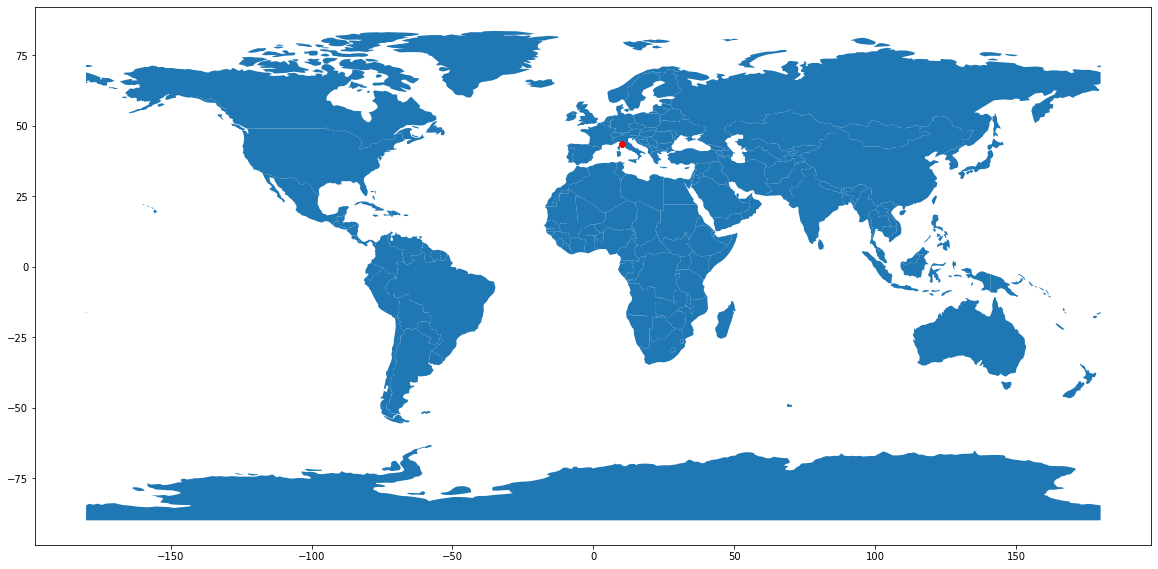

In [34]:
import matplotlib.pyplot as plt
figura, asse = plt.subplots()
figura.set_size_inches(20,20)
asse.set_aspect('equal')
#world.plot(ax=ax, color='white', edgecolor='black')
world.plot(ax=asse)
livorno.plot(ax=asse,color='red',markersize=20)
plt.show()

In [35]:
# tonnellaggio totale
livorno['TOTAL_TONS'].sum()

3129.0

In [36]:
# tonnellaggio per paese attaccante
livorno.groupby('COUNTRY_FLYING_MISSION')['TOTAL_TONS'].sum().sort_values(ascending=False)

COUNTRY_FLYING_MISSION
USA             3,029.00
GREAT BRITAIN     100.00
Name: TOTAL_TONS, dtype: float64

In [37]:
#tonnellaggio per tipologie obiettivo
livorno.groupby('TGT_TYPE')['TOTAL_TONS'].sum().sort_values(ascending=False)

TGT_TYPE
HARBOR                1,694.00
R R TRACKS              401.00
UNIDENTIFIED TARGET     388.00
SHIPPING                364.00
CITY AREA               105.00
POWER STATION            94.00
OIL STORAGE              41.00
SHIP YARDS               36.00
Name: TOTAL_TONS, dtype: float64

In [38]:
livorno.groupby('MSNDATE')['TOTAL_TONS'].sum().sort_values(ascending=False)

MSNDATE
1944-06-07   486.00
1943-05-28   279.00
1944-05-19   272.00
1944-06-13   216.00
1943-09-21   190.00
1944-06-14   144.00
1944-04-15   118.00
1944-03-30   114.00
1944-04-14   114.00
1944-03-18   108.00
1944-03-16   100.00
1943-07-24    94.00
1944-03-22    94.00
1944-04-01    80.00
1944-06-21    76.00
1944-06-22    72.00
1944-02-14    68.00
1944-03-29    68.00
1944-02-21    54.00
1944-03-24    50.00
1944-02-18    50.00
1944-02-15    50.00
1943-06-28    50.00
1944-07-08    21.00
1944-02-13    21.00
1943-11-04    21.00
1944-07-07    21.00
1944-02-07    20.00
1944-07-06    18.00
1944-07-03    18.00
1944-07-04    15.00
1943-05-25     9.00
1944-07-05     9.00
1944-04-16     6.00
1944-07-12     3.00
1944-07-11     0.00
Name: TOTAL_TONS, dtype: float64

In [39]:
type(livorno)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:ylabel='TGT_TYPE'>

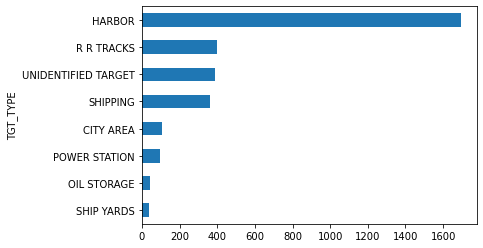

In [40]:
livorno.groupby('TGT_TYPE')['TOTAL_TONS'].sum().sort_values(ascending=True).plot.barh(x='TGT_TYPE',y='TOTAL_TONS')

<AxesSubplot:xlabel='TGT_TYPE'>

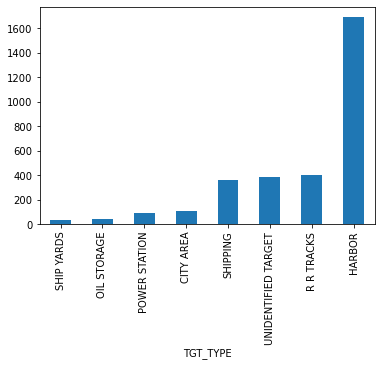

In [41]:
livorno.groupby('TGT_TYPE')['TOTAL_TONS'].sum().sort_values(ascending=True).plot.bar(x='TOTAL_TONS',y='TGT_TYPE')

### MAPPA

In [42]:
obiettivi_italia = gdf[gdf['TGT_COUNTRY']=='ITALY']

In [43]:
obiettivi_italia.head(5)

WWII_ID  MASTER_INDEX_NUMBER    MSNDATE THEATER    NAF  \
0        1                  NaN 1943-08-15     MTO  12 AF   
2        3                  NaN 1943-08-15     MTO  12 AF   
3        4                  NaN 1943-08-15     MTO  12 AF   
8        9                  NaN 1943-08-15     MTO  12 AF   
9       10                  NaN 1943-08-15     MTO  12 AF   

  COUNTRY_FLYING_MISSION  TGT_COUNTRY_CODE TGT_COUNTRY TGT_LOCATION TGT_TYPE  \
0                    USA             13.00       ITALY    SPADAFORA      NaN   
2                    USA             13.00       ITALY      COSENZA      NaN   
3                    USA             13.00       ITALY  GIOJA TAURO      NaN   
8                    USA             13.00       ITALY       SCILLA      NaN   
9                    USA             13.00       ITALY  GIOJA TAURO      NaN   

     TGT_ID  TGT_INDUSTRY_CODE                  TGT_INDUSTRY SOURCE_LATITUDE  \
0 40,675.00             650.00                           NaN      38.2166667   
2  9,630.00             810.00                           NaN           3916N   
3 16,140.00             631.00                           NaN           3826N   
8 39,469.00             830.00                           NaN           3814N   
9 16,140.00              20.00  ARMAMENT AND ORDNANCE PLANTS           3826N   

  SOURCE_LONGITUDE  LATITUDE  LONGITUDE        UNIT_ID  MDS AIRCRAFT_NAME  \
0       15.3666667     38.22      15.37  27 FBG/86 FBG  A36           A36   
2             1615     39.27      16.25  27 FBG/86 FBG  A36           A36   
3             1554     38.43      15.90  27 FBG/86 FBG  A36           A36   
8             1543     38.23      15.72  27 FBG/86 FBG  A36           A36   
9             1554     38.43      15.90  27 FBG/86 FBG  A36           A36   

   MSN_TYPE TGT_PRIORITY TGT_PRIORITY_EXPLANATION  AC_ATTACKING  ALTITUDE  \
0       NaN          NaN                      NaN           NaN       NaN   
2       NaN          NaN                      NaN           NaN       NaN   
3       NaN          NaN                      NaN           NaN       NaN   
8       NaN          NaN                      NaN           NaN       NaN   
9       NaN          NaN                      NaN           NaN       NaN   

   ALTITUDE_FEET  NUMBER_OF_HE              TYPE_OF_HE  LBS_HE  TONS_OF_HE  \
0           0.00         40.00  500 LB GP (GP-M43/M64)     NaN       10.00   
2           0.00         36.00  500 LB GP (GP-M43/M64)     NaN        9.00   
3           0.00         30.00  500 LB GP (GP-M43/M64)     NaN        7.50   
8           0.00          0.00  500 LB GP (GP-M43/M64)     NaN        0.00   
9           0.00          0.00  500 LB GP (GP-M43/M64)     NaN        0.00   

   NUMBER_OF_IC TYPE_OF_IC  LBS_IC  TONS_OF_IC  NUMBER_OF_FRAG TYPE_OF_FRAG  \
0           NaN        NaN     NaN         NaN             NaN          NaN   
2           NaN        NaN     NaN         NaN             NaN          NaN   
3           NaN        NaN     NaN         NaN             NaN          NaN   
8           NaN        NaN     NaN         NaN             NaN          NaN   
9           NaN        NaN     NaN         NaN             NaN          NaN   

   LBS_FRAG  TONS_OF_FRAG  TOTAL_LBS  TOTAL_TONS          TAKEOFF_BASE  \
0       NaN           NaN        NaN       10.00  PONTE OLIVO AIRFIELD   
2       NaN           NaN        NaN        9.00  PONTE OLIVO AIRFIELD   
3       NaN           NaN        NaN        7.50  PONTE OLIVO AIRFIELD   
8       NaN           NaN        NaN        0.00  PONTE OLIVO AIRFIELD   
9       NaN           NaN        NaN        0.00  PONTE OLIVO AIRFIELD   

  TAKEOFF_COUNTRY  TAKEOFF_LATITUDE  TAKEOFF_LONGITUDE  AC_LOST  AC_DAMAGED  \
0          SICILY             37.13              14.32      NaN         NaN   
2          SICILY             37.13              14.32      NaN         NaN   
3          SICILY             37.13              14.32      NaN         NaN   
8          SICILY             37.13        

In [44]:
obiettivi_italia = obiettivi_italia[['TGT_LOCATION','geometry']]

In [45]:
obiettivi_italia = obiettivi_italia.dropna() # dropna Remove missing values.

In [46]:
obiettivi_italia

TGT_LOCATION                   geometry
0              SPADAFORA  POINT (15.37000 38.22000)
2                COSENZA  POINT (16.25000 39.27000)
3            GIOJA TAURO  POINT (15.90000 38.43000)
8                 SCILLA  POINT (15.72000 38.23000)
9            GIOJA TAURO  POINT (15.90000 38.43000)
...                  ...                        ...
178146  41 00 N 016 40 E  POINT (16.67000 41.00000)
178147  41 00 N 016 40 E  POINT (16.67000 41.00000)
178148  41 00 N 016 40 E  POINT (16.67000 41.00000)
178194             FIUME  POINT (14.43000 45.33000)
178195             FIUME  POINT (14.43000 45.33000)

[23220 rows x 2 columns]

In [47]:
obbiettivi_italia = obiettivi_italia.drop_duplicates() # drop_duplicates Return DataFrame with duplicate rows removed.

In [48]:
obbiettivi_italia.head(5)

TGT_LOCATION                   geometry
0     SPADAFORA  POINT (15.37000 38.22000)
2       COSENZA  POINT (16.25000 39.27000)
3   GIOJA TAURO  POINT (15.90000 38.43000)
8        SCILLA  POINT (15.72000 38.23000)
65        AGATA  POINT (14.63000 38.08000)

In [49]:
import folium
import math

In [50]:
mappa = folium.Map()

In [51]:
for indice,riga in obbiettivi_italia.iterrows():
    lng = riga['geometry'].x
    lat = riga['geometry'].y
    #print(indice)
    #print(riga['geometry'].x)
    #print(riga['TGT_LOCATION'])
    if (not(math.isnan(lat) and math.isnan(lng))):
        folium.Marker(
            location = [lat,lng],
            popup = riga['TGT_LOCATION'],
            icon=folium.Icon(color="red"),
        ).add_to(mappa)
    

In [58]:
mappa

In [53]:
mappa.save('italia.html')